In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
import numpy as np
import math
from sklearn import preprocessing
print("done...")


done...


In [9]:
df = pd.read_csv(r"C:\Users\tobia\Downloads\Electric_Production.csv", parse_dates=['DATE'])

In [11]:
df['DATE'].dtypes

dtype('<M8[ns]')

In [13]:
df.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


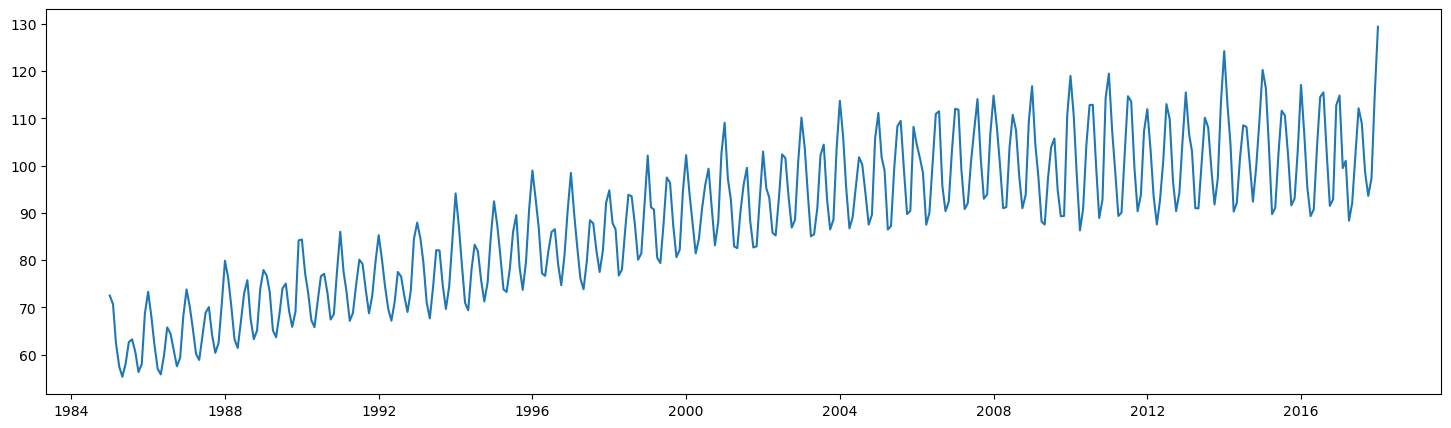

In [15]:
# Plot initial graph
x = df["DATE"]
y = df["Value"]
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(x,y)
plt.show()

In [17]:
# Check for nulls
df.isna().sum()

DATE     0
Value    0
dtype: int64

In [19]:
df.describe()

,DATE,Value
count,397,397.000000
mean,2001-07-01 13:25:14.357682560,88.847218
min,1985-01-01 00:00:00,55.315100
25%,1993-04-01 00:00:00,77.105200
50%,2001-07-01 00:00:00,89.779500
75%,2009-10-01 00:00:00,100.524400
max,2018-01-01 00:00:00,129.404800
std,NaN,15.387834


In [21]:
# Multiplicative Decomposition
df = pd.read_csv(r"C:\Users\tobia\Downloads\Electric_Production.csv", parse_dates=['DATE'], index_col='DATE')

result_mul = seasonal_decompose(df['Value'], model='multiplicative', extrapolate_trend='freq')

In [23]:
# Additive Decomposition
result_add = seasonal_decompose(df['Value'], model='additive', extrapolate_trend='freq')

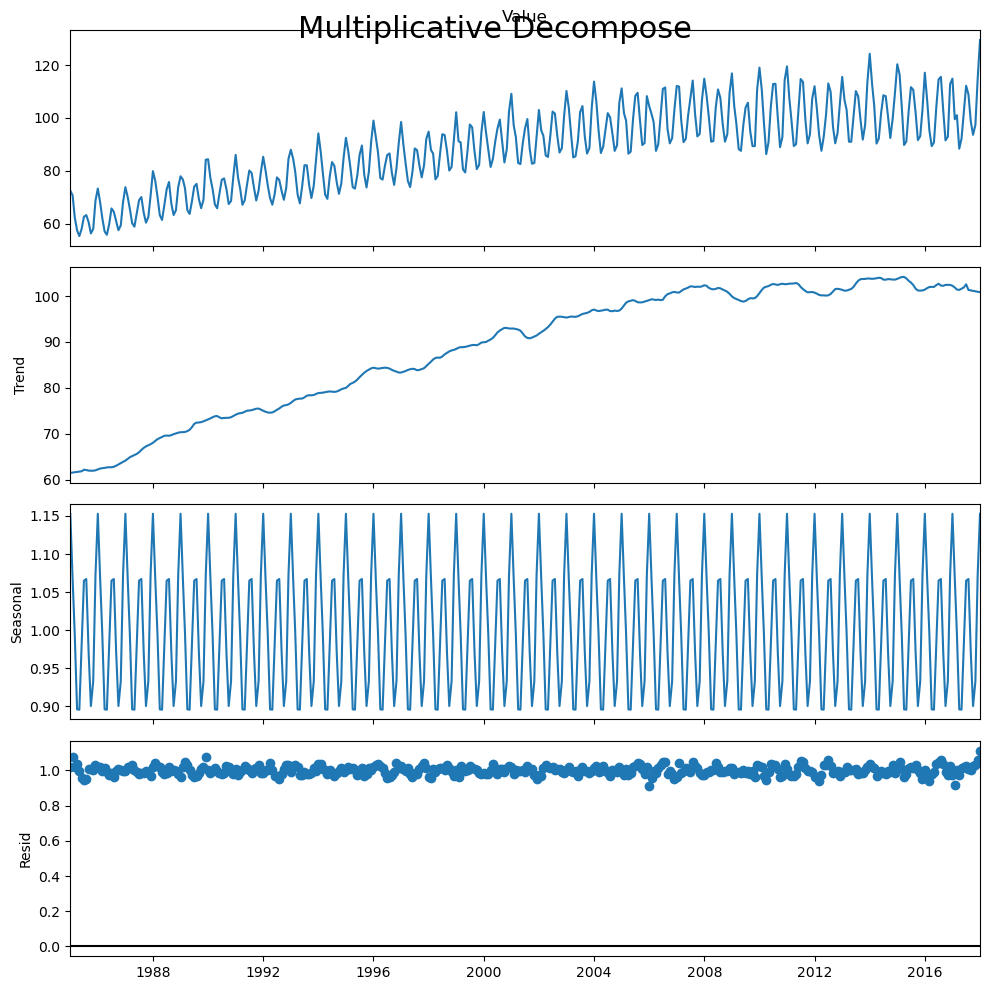

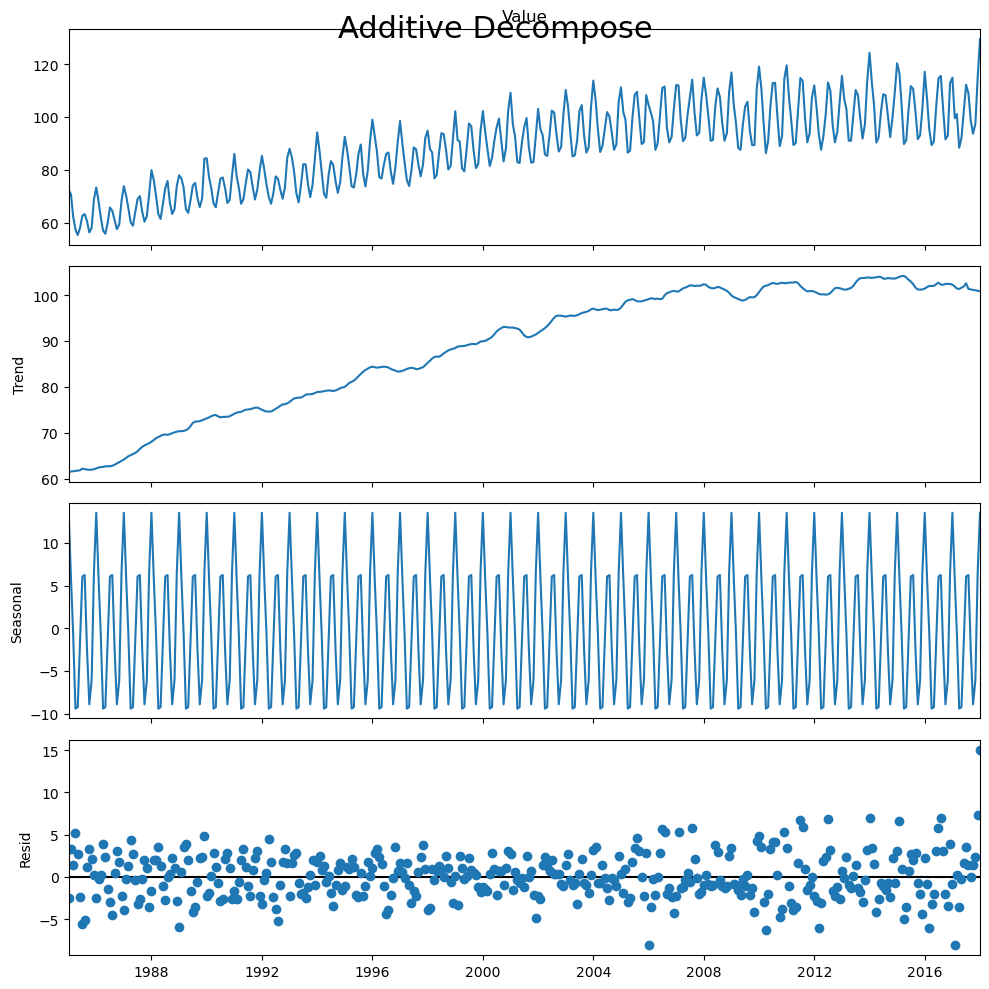

In [25]:
#Plot

plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [27]:
# Extract Components 
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
DATE,,,,
1985-01-01,1.152903,61.508657,1.022446,72.5052
1985-02-01,1.067341,61.577679,1.075279,70.6720
1985-03-01,0.995556,61.646701,1.017556,62.4502
1985-04-01,0.896242,61.715723,1.039036,57.4714
1985-05-01,0.895830,61.784745,0.999395,55.3151


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
# Model fit
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

C:\Users\tobia\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tobia\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -888.613
Date:                            Thu, 29 Jan 2026   AIC                           1787.226
Time:                                    20:15:45   BIC                           1806.979
Sample:                                01-01-1985   HQIC                          1795.061
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5249      0.045     11.764      0.000       0.437       0.612
ma.L1         -0.9547      0.018    -54.378      0.000      -0.989      -0.920
ar.S.L12       0.0417      0.057      0.727      0.467      -0.071       0.154
ma.S.L12      -0.7688      0.045    -17.104      0.000      -0.857      -0.681
sigma2         5.8004      0.341     16.998      0.000       5.132       6.469
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                27.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Create a list and append it with the predicted data
prediction = []
for i in range(12):
    yhat = model_fit.predict(len(df) + i-1)
    prediction.append([yhat.index[0], yhat[0]])
    print(yhat)

C:\Users\tobia\AppData\Local\Temp\ipykernel_28312\2699470311.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction.append([yhat.index[0], yhat[0]])


2018-01-01    120.38248
Freq: MS, dtype: float64
2018-02-01    114.01141
Freq: MS, dtype: float64
2018-03-01    105.122195
Freq: MS, dtype: float64
2018-04-01    92.714328
Freq: MS, dtype: float64
2018-05-01    94.159403
Freq: MS, dtype: float64
2018-06-01    104.621735
Freq: MS, dtype: float64
2018-07-01    113.861597
Freq: MS, dtype: float64
2018-08-01    112.608923
Freq: MS, dtype: float64
2018-09-01    101.93192
Freq: MS, dtype: float64
2018-10-01    93.997362
Freq: MS, dtype: float64
2018-11-01    97.271179
Freq: MS, dtype: float64
2018-12-01    112.651718
Freq: MS, dtype: float64


In [37]:
yhat.index[0]

Timestamp('2018-12-01 00:00:00')

In [39]:
print(prediction)

[[Timestamp('2018-01-01 00:00:00'), 120.38247960882447], [Timestamp('2018-02-01 00:00:00'), 114.01141023332659], [Timestamp('2018-03-01 00:00:00'), 105.12219505650037], [Timestamp('2018-04-01 00:00:00'), 92.71432790499684], [Timestamp('2018-05-01 00:00:00'), 94.15940295815861], [Timestamp('2018-06-01 00:00:00'), 104.62173468947309], [Timestamp('2018-07-01 00:00:00'), 113.86159721046118], [Timestamp('2018-08-01 00:00:00'), 112.60892328286921], [Timestamp('2018-09-01 00:00:00'), 101.93192015823229], [Timestamp('2018-10-01 00:00:00'), 93.99736203732867], [Timestamp('2018-11-01 00:00:00'), 97.27117887148788], [Timestamp('2018-12-01 00:00:00'), 112.65171825621672]]


In [41]:
# Electric Production Prediction table for year 2018
df2 = pd.DataFrame(prediction, columns = ['DATE', 'Value'])
display(df2)


,DATE,Value
0,2018-01-01,120.382480
1,2018-02-01,114.011410
2,2018-03-01,105.122195
3,2018-04-01,92.714328
4,2018-05-01,94.159403
5,2018-06-01,104.621735
6,2018-07-01,113.861597
7,2018-08-01,112.608923
8,2018-09-01,101.931920
9,2018-10-01,93.997362


In [43]:
df2['DATE'].dtypes

dtype('<M8[ns]')

In [45]:
df = df.reset_index()
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [47]:
result = pd.concat([df, df2], ignore_index=True, axis = 0)

In [49]:
result

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608923
405,2018-09-01,101.931920
406,2018-10-01,93.997362
407,2018-11-01,97.271179


In [51]:
df_predicted = pd.DataFrame(data=result)
df_predicted

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608923
405,2018-09-01,101.931920
406,2018-10-01,93.997362
407,2018-11-01,97.271179
